## Problem 5

Epoch 1/200


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5312 - val_loss: 2.0634
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0552 - val_loss: 1.9326
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9746 - val_loss: 1.8672
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8735 - val_loss: 1.7969
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8115 - val_loss: 1.7355
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7373 - val_loss: 1.6864
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6952 - val_loss: 1.6606
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7203 - val_loss: 1.6278
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6615 - val_loss: 1.5859
Epoch 10/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6061 - val_loss: 1.5613
Epoch 11/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6333 - val_loss: 1.5351
Epoch 12/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

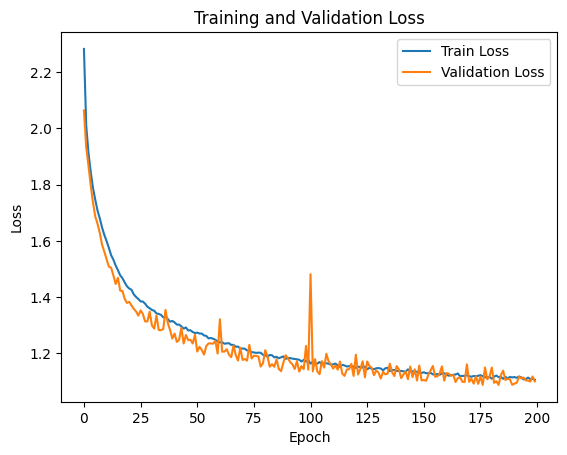

End Effector Position at t=0: (x=3.0, y=0.0, phi=0.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Joint Angles at t=0: θ1=0.03897907957434654, θ2=-0.2615056335926056, θ3=0.17728427052497864
Difference in Joint Angles: Δθ1=-0.03897907957434654, Δθ2=0.2615056335926056, Δθ3=-0.17728427052497864


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the lengths of the robot arms
L1 = 1.0
L2 = 1.0
L3 = 1.0

# Generate joint angles in the range [-π, π]
angles = np.linspace(-np.pi, np.pi, 20)

# Prepare to store the data
data = []

# Generate the dataset
for theta1 in angles:
    for theta2 in angles:
        for theta3 in angles:
            x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3)
            y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2) + L3 * np.sin(theta1 + theta2 + theta3)
            phi = theta1 + theta2 + theta3
            data.append([x, y, phi, theta1, theta2, theta3])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['x', 'y', 'phi', 'theta1', 'theta2', 'theta3'])

# Save to CSV
df.to_csv('kinematics_data.csv', index=False)

# Load the dataset
data = pd.read_csv('kinematics_data.csv')

# Split data into input (x, y, phi) and output (theta1, theta2, theta3)
X = data[['x', 'y', 'phi']].values
y = data[['theta1', 'theta2', 'theta3']].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(50, input_dim=3, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='linear'))

# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Plot the training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Initial joint angles at t=0
theta1_0 = 0.0  # example value
theta2_0 = 0.0  # example value
theta3_0 = 0.0  # example value

# Calculate end effector position
x_0 = L1 * np.cos(theta1_0) + L2 * np.cos(theta1_0 + theta2_0) + L3 * np.cos(theta1_0 + theta2_0 + theta3_0)
y_0 = L1 * np.sin(theta1_0) + L2 * np.sin(theta1_0 + theta2_0) + L3 * np.sin(theta1_0 + theta2_0 + theta3_0)
phi_0 = theta1_0 + theta2_0 + theta3_0

print(f"End Effector Position at t=0: (x={x_0}, y={y_0}, phi={phi_0})")

# Input end effector position to the neural network
end_effector_position = np.array([[x_0, y_0, phi_0]])

# Predict the joint angles using the trained neural network
predicted_angles = model.predict(end_effector_position)

# Extract predicted joint angles
predicted_theta1, predicted_theta2, predicted_theta3 = predicted_angles[0]

print(f"Predicted Joint Angles at t=0: θ1={predicted_theta1}, θ2={predicted_theta2}, θ3={predicted_theta3}")

# Initial joint angles from Q1
initial_joint_angles = np.array([theta1_0, theta2_0, theta3_0])

# Predicted joint angles
predicted_joint_angles = predicted_angles[0]

# Calculate the difference
difference = initial_joint_angles - predicted_joint_angles

print(f"Difference in Joint Angles: Δθ1={difference[0]}, Δθ2={difference[1]}, Δθ3={difference[2]}")
